In [2]:
import pandas as pd
src_data = pd.read_csv('c:/data/수박과참외.csv' ,encoding='cp949')


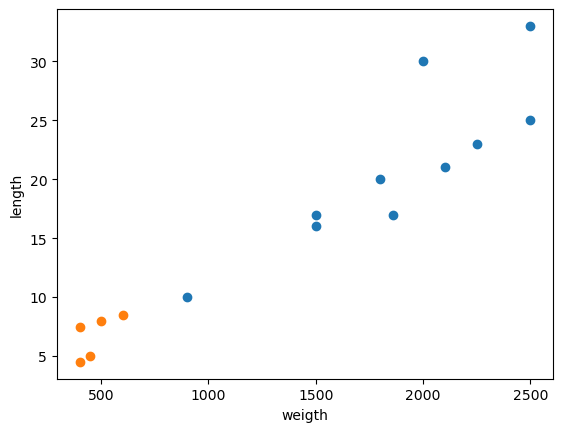

In [4]:
#수박과 참외의 무게와 길이 데이터 생성
수박정보 = src_data.loc[ (src_data['종류'] =='수박'), ['무게','길이']]
참외정보 = src_data.loc[ (src_data['종류'] =='참외'), ['무게','길이']]

#그래프로 데이터의 분포 확인하기
import matplotlib.pyplot as plt
plt.scatter(수박정보.무게,수박정보.길이)
plt.scatter(참외정보.무게,참외정보.길이)
plt.xlabel('weigth')
plt.ylabel('length')
plt.show()

In [5]:
#KNN이 좋아하는 형태로 만들기
import numpy as np
data = np.column_stack( (src_data.무게, src_data.길이) )
target = src_data.종류

#훈련용 데이터와 테스트용 데이터로 나누기
from sklearn.model_selection import train_test_split
훈련용_data , 테스트용_data , 훈련용_target , 테스트용_target = train_test_split(
    data , target , random_state=40 )

print(훈련용_data.shape , 테스트용_data.shape)

(11, 2) (4, 2)


In [10]:
#KNN 알고리즘으로 분석하여 모델 만들고 성능 확인하기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(훈련용_data , 훈련용_target)
kn.score(테스트용_data , 테스트용_target)

#예측하기
print( kn.predict([[500, 15]]))

['참외']


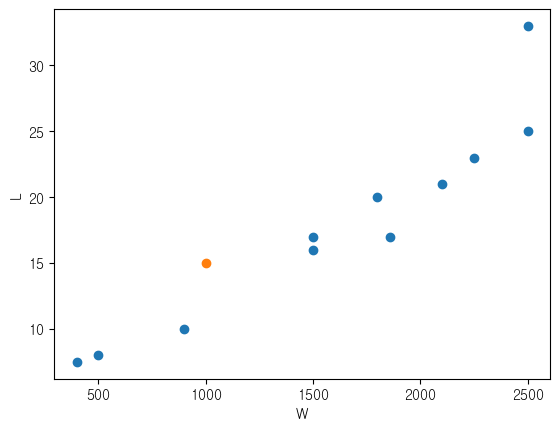

In [12]:
#그래프로 데이터의 분포 보기
import matplotlib.pyplot as plt
plt.rc('font', family='gulim') 

plt.scatter(훈련용_data[:,0], 훈련용_data[:,1])
plt.scatter(1000, 15, marker='o')
plt.xlabel('W')
plt.ylabel('L')
plt.show()

In [13]:

#데이터 표준화하기
mean = np.mean(훈련용_data, axis=0)
std = np.std(훈련용_data, axis=0)
훈련데이터_표준점수 = (훈련용_data - mean) / std

훈련데이터_표준점수

#표준화 한 데이터를 학습하기
테스트데이터_표준점수 = ((테스트용_data) - mean) / std
찾는과일 = ([1000, 15] - mean) / std

kn.fit(훈련데이터_표준점수, 훈련용_target)
kn.score(테스트데이터_표준점수, 테스트용_target)
print(kn.predict([찾는과일]))
distances, indexes = kn.kneighbors([찾는과일])


['수박']


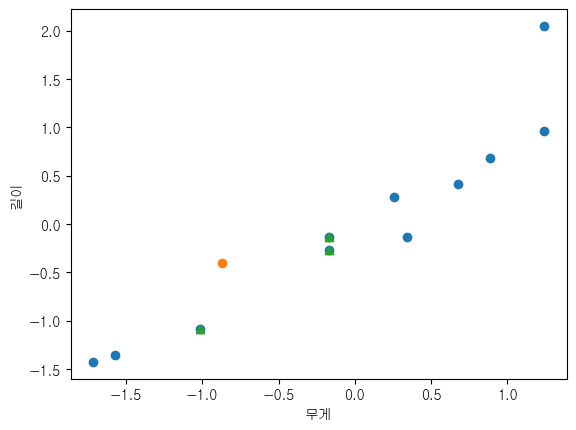

In [14]:

#어떤 데이터를 참고했는지 그래프로 확인하기
plt.scatter(훈련데이터_표준점수[:,0], 훈련데이터_표준점수[:,1])
plt.scatter(찾는과일[0], 찾는과일[1], marker='o')
plt.scatter(훈련데이터_표준점수[indexes,0], 훈련데이터_표준점수[indexes,1], marker='^')
plt.xlabel('무게')
plt.ylabel('길이')
plt.show()

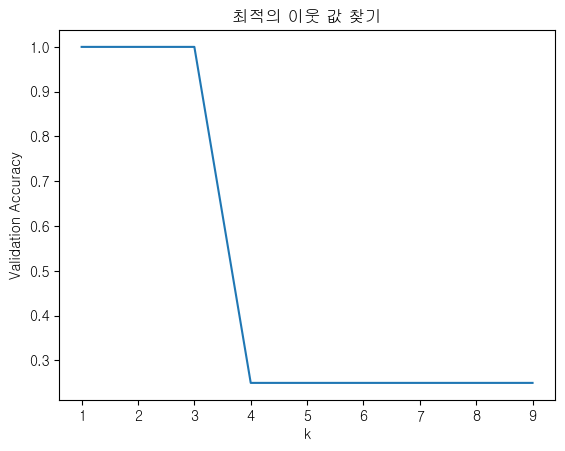

In [17]:
#최적의 이웃 개수 찾기
import matplotlib.pyplot as plt
plt.rc('font', family='gulim') 

k_list = range(1,10)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(훈련용_data, 훈련용_target.values.ravel())
  accuracies.append(classifier.score(테스트용_data, 테스트용_target))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("최적의 이웃 값 찾기")
plt.show()